In [1]:
import pandas as pd
import numpy as np
import pickle
%matplotlib inline

In [2]:
with open('../src/model_60.pkl', 'rb') as f:
    res = pickle.load(f)

/home/atorres/.local/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator ElasticNetCV from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/atorres/.local/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator MultiOutputRegressor from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [4]:
from sklearn.metrics import mean_absolute_error

In [7]:
(res['pred'].stack(level='location')
            .groupby('location')
            .apply(lambda s: mean_absolute_error(s['Actual'], s['Pred']))
            .sort_values())

location
GH_AP3     41.241154
GH_DH8     45.938235
GH_DH11    49.423515
GH_AP5     49.645482
GT_DH1     50.231419
GH_DH9     51.907006
GH_DH6     52.297263
GH_DH10    54.070373
GT_AP6     54.349100
GH_DH7     55.919739
GH_AP1     56.424958
GH_DH4     56.999730
GH_DH5     57.467484
GH_DH3     58.021214
GH_DH1     59.039821
GH_DH2     60.613714
GH_AP4     62.789525
GH_AP6     68.230467
GH_AP7     71.463068
dtype: float64

In [28]:
for model in res['model'].estimators_:
    print(model.alpha_)

236.29845387296407
228.20621132513634
233.56121733057265
233.63028731859296
231.64040958616263
241.4351382172005
226.36081495517814
223.46949939086716
230.06836928955258
397.2546295012223
238.258898399358
229.0993078947758
184.63789964608543
231.85962724538288
422.32621935864444
429.60172277275757
237.29214023507848
231.9479629817645
236.37827441812217


In [69]:
coef_list = [ np.abs(model.coef_.reshape(59, 19).T) for model in res['model'].estimators_ ]

In [93]:
import seaborn as sns

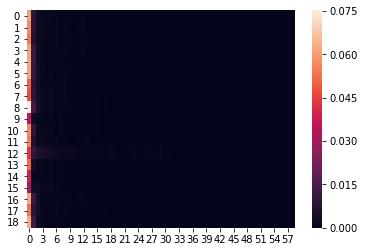

In [91]:
sns.heatmap(np.dstack(coef_list).mean(axis=0).T);

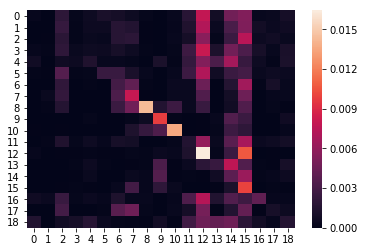

In [94]:
sns.heatmap(np.dstack(coef_list).mean(axis=1).T);